In [144]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import squarify

In [145]:
df = pd.read_csv('unemployement-rate-1948-2010.csv')
df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [146]:
count_all = df.groupby(['Year']).sum()

In [147]:
df.rename(columns={'Value':'Unemployment.Rate'}, inplace=True)
df

,Series id,Year,Period,Unemployment.Rate
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


In [148]:
df['Month'] = pd.to_datetime(df['Period'], format='M%m').dt.month_name().str.slice(stop=3)
df

,Series id,Year,Period,Unemployment.Rate,Month
0,LNS14000000,1948,M01,3.4,Jan
1,LNS14000000,1948,M02,3.8,Feb
2,LNS14000000,1948,M03,4.0,Mar
3,LNS14000000,1948,M04,3.9,Apr
4,LNS14000000,1948,M05,3.5,May
...,...,...,...,...,...
741,LNS14000000,2009,M10,10.1,Oct
742,LNS14000000,2009,M11,10.0,Nov
743,LNS14000000,2009,M12,10.0,Dec
744,LNS14000000,2010,M01,9.7,Jan


In [149]:
df = df.drop(['Series id', 'Period'], axis=1)
index_df = df.set_index('Year')


Text(0, 0.5, 'Unemployment Rate (%)')

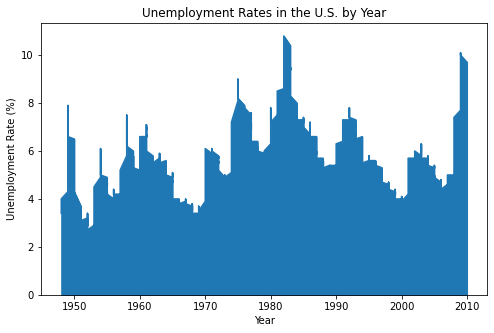

In [150]:
ax = index_df.plot.area(legend=False, title='Unemployment Rates in the U.S. by Year',
            figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate (%)')

In [208]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
df

In [210]:
merged_df = pd.merge(left=count_all, right=df, left_on='Year', right_on='Year')
merged_df['Annual.percent'] = (merged_df['Unemployment.Rate'] / merged_df['Value']) * merged_df['Unemployment.Rate']
merged_df.to_csv('unemp_rates.csv', index=False)

In [153]:
pivot_df = pd.pivot_table(merged_df, index=['Year'],
                               columns=['Month'],
                               values=['Annual.percent'], 
                               fill_value=0)

Text(0, 0.5, 'Unemployment Rate (%)')

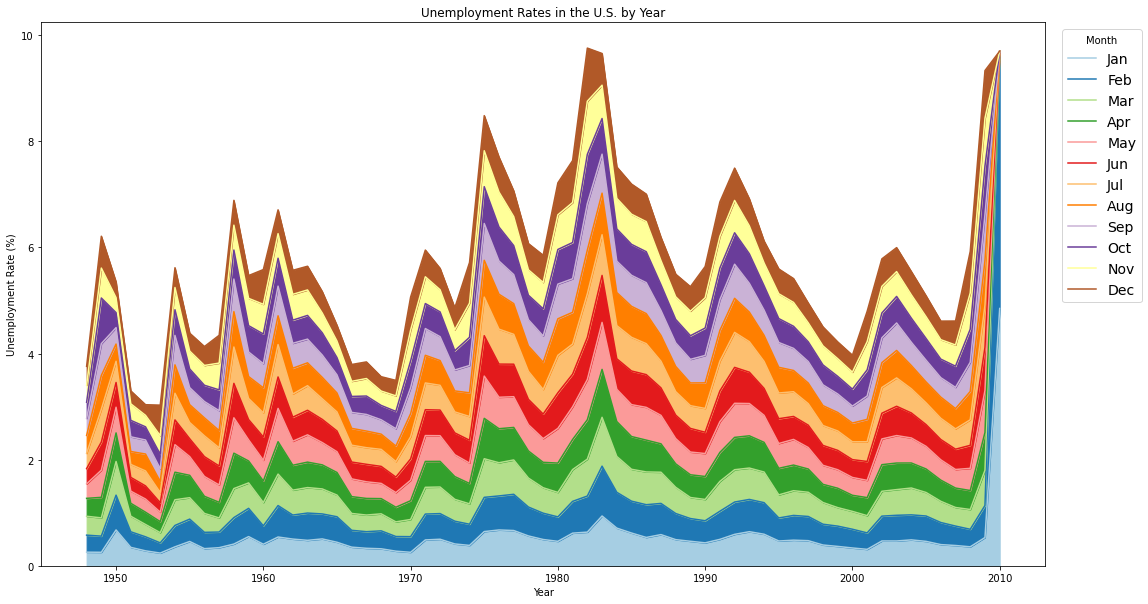

In [182]:
pal = sns.color_palette("Paired")
ax = pivot_df.plot.area(figsize=(18, 10), color=pal, title='Unemployment Rates in the U.S. by Year')
ax.legend(["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
          title='Month', bbox_to_anchor=(1.01, 1), loc='upper left', prop=dict(size=14))
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate (%)')

In [161]:
rates_2008 = df[df['Year'] == 2008] 
rates_2008

,Year,Unemployment.Rate,Month
720,2008,5.0,Jan
721,2008,4.8,Feb
722,2008,5.1,Mar
723,2008,5.0,Apr
724,2008,5.4,May
725,2008,5.5,Jun
726,2008,5.8,Jul
727,2008,6.1,Aug
728,2008,6.2,Sep
729,2008,6.6,Oct


In [175]:
# making copy of team column 
new = rates_2008['Unemployment.Rate'].astype(str)
  
# concatenating team with name column 
# overwriting name column 
rates_2008["labels"]= rates_2008["Month"].str.cat(new, sep =", ") 
rates_2008

<ipython-input-175-83a2fc21038d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rates_2008["labels"]= rates_2008["Month"].str.cat(new, sep =", ")


,Year,Unemployment.Rate,Month,labels
720,2008,5.0,Jan,"Jan, 5.0"
721,2008,4.8,Feb,"Feb, 4.8"
722,2008,5.1,Mar,"Mar, 5.1"
723,2008,5.0,Apr,"Apr, 5.0"
724,2008,5.4,May,"May, 5.4"
725,2008,5.5,Jun,"Jun, 5.5"
726,2008,5.8,Jul,"Jul, 5.8"
727,2008,6.1,Aug,"Aug, 6.1"
728,2008,6.2,Sep,"Sep, 6.2"
729,2008,6.6,Oct,"Oct, 6.6"


In [ ]:
plt.rcParams["figure.figsize"] = (10,10)


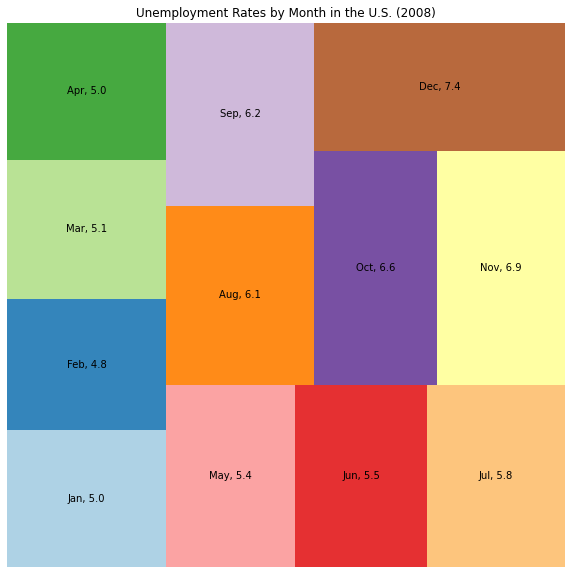

In [207]:
ax = squarify.plot(sizes=rates_2008['Unemployment.Rate'], label=(rates_2008['labels']), alpha=.9, color=pal )
plt.axis('off')
plt.title('Unemployment Rates by Month in the U.S. (2008)',fontsize=12)
plt.show()
